In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get the training data

In [2]:
dfx = pd.read_csv('./data/linearX.csv')
dfy = pd.read_csv('./data/linearY.csv')

x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


### Visualising and pre processing

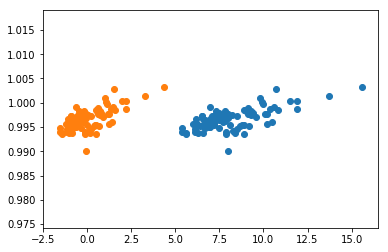

In [5]:
plt.scatter(x,y)

X = (x-x.mean())/x.std()
Y = y

plt.scatter(X,Y)

plt.show()

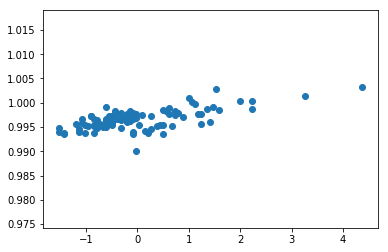

In [6]:
plt.scatter(X,Y)
plt.show()

### Gradient Algorithm
- Start with a random theta
- Repeat until convergence
    - Update theta according to the rule

In [29]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    
    m = X.shape[0]
    e = 0
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        e += (hx-Y[i])**2
        
    return e

def gradient(X,Y, theta):
    
    grad = np.zeros((2, ))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr <= max_itr):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1

    return theta, error_list, theta_list

In [30]:
final_theta, error_list, theta_list = gradientDescent(X,Y)

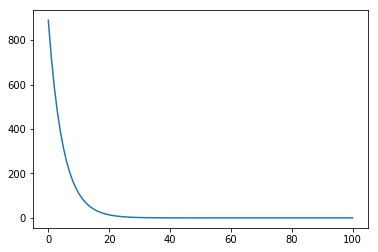

In [31]:
plt.plot(error_list)
plt.show()

In [32]:
print(final_theta)

[0.996554  0.0013579]


### Plotting the line for testing data

In [33]:
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


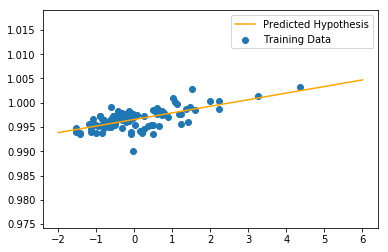

In [34]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest, hypothesis(xtest, final_theta), color='orange', label='Predicted Hypothesis')
plt.legend()
plt.show()

### Visualising Gradient Descent
- Plotting error surface and contours

In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [36]:
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)

T0,T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)
m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)


### Plotting the 3D Loss

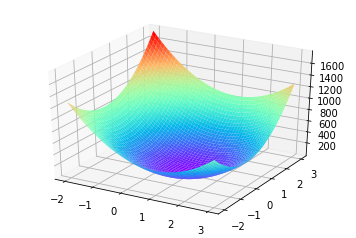

In [37]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

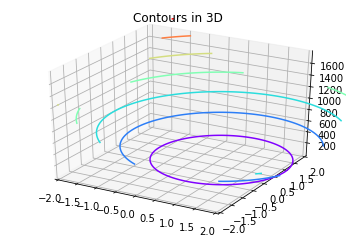

In [38]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
axes.contour(T0,T1,J,cmap='rainbow')
plt.title("Contours in 3D")
plt.show()

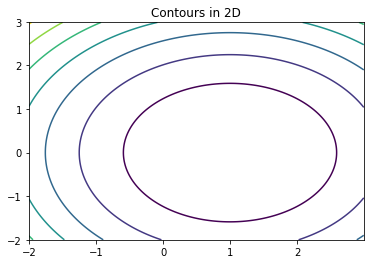

In [39]:
plt.contour(T0,T1,J)
plt.title("Contours in 2D")
plt.show()

### Plotting the trajectory of gradient descent

In [40]:
theta_list = np.array(theta_list)

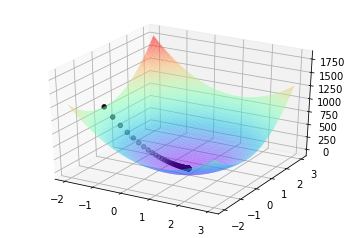

In [42]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list,c='k')
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.5)
plt.show()

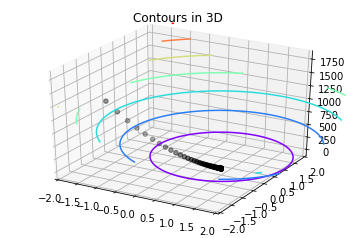

In [43]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
axes.scatter(theta_list[:,0], theta_list[:,1], error_list,c='k')
axes.contour(T0,T1,J,cmap='rainbow')
plt.title("Contours in 3D")
plt.show()

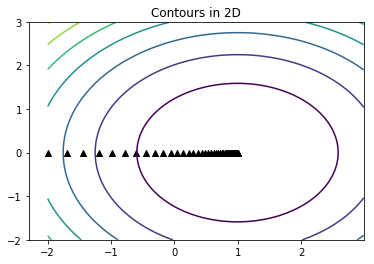

In [46]:
plt.contour(T0,T1,J)
plt.scatter(theta_list[:,0], theta_list[:,1],c='k',marker='^')
plt.title("Contours in 2D")
plt.show()